Does MMMmax correlate with annual 95th percentile?

In [1]:
import numpy as np
import xarray as xr
import extremespaper as ex
import viz
import mplRC
import matplotlib.pyplot as plt
import matplotlib.colors as mcols
import cartopy.crs as ccrs
import cftime
import datetime as dt
import os
import glob
import matplotlib.cm as mcm
import warnings
import dask.array as da
import cmocean
mplRC.paperRC2()
from dask.distributed import Client, LocalCluster

warnings.filterwarnings(action='ignore',message='Mean of empty slice',category=RuntimeWarning)
warnings.filterwarnings(action='ignore',message='invalid value encountered in scalar divide',
                        category=RuntimeWarning)

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy39dc/lib/python3.9/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [1]:
varLabels={'tos':'SST (°C)','hplusos':'Surface\nH$^+$ (μM)','omega_arag_0':'Surface \n$\Omega _a$',
           'o2_mean_100_600': '100-600m Mean\nO$_2$ (mol m$^{-3}$)','intpp':'Integrated PP\n (mol m$^{-2}$s$^{-1}$)',
          'spco2':'Surface\npCO$_2$ (μatm)'}

# plot AME versus annual percentile for each 3 scenarios (hist, 126, 370)

In [2]:
ivar='hplusos'
mfd={}
mm={}
for iscen in ['ESM4_historical_D1','ESM4_ssp126_D1','ESM4_ssp370_D1']:
    yrspan=ex.dictScenDates[iscen]
    __,__,__,__,dsD=ex.loadSlab(ivar,'daily',iscen,[yrspan[-1]-1,yrspan[-1]],ex.chunksdef)
    __,__,__,__,dsM=ex.loadSlab(ivar,'monthly',iscen,[yrspan[-1]-1,yrspan[-1]],ex.chunksdef)
    mfd[iscen] = dsD.resample(time="1M").mean().hplusos.values
    mm[iscen] = dsM.hplusos.values

2025-05-20 06:10:48.414192
2025-05-20 06:10:49.157384
hplusos micromol/l
2025-05-20 06:10:49.160674
2025-05-20 06:10:49.245692
hplusos micromol/l


<string>:6: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


2025-05-20 06:10:50.490610
2025-05-20 06:10:51.264377
hplusos micromol/l
2025-05-20 06:10:51.267751
2025-05-20 06:10:51.367342
hplusos micromol/l


<string>:6: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


2025-05-20 06:10:52.839790
2025-05-20 06:10:53.450178
hplusos micromol/l
2025-05-20 06:10:53.466872
2025-05-20 06:10:53.557951
hplusos micromol/l


<string>:6: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


In [3]:
difs=np.array([np.ndarray.flatten(mfd['ESM4_historical_D1'])-np.ndarray.flatten(mm['ESM4_historical_D1']),
               np.ndarray.flatten(mfd['ESM4_ssp126_D1'])-np.ndarray.flatten(mm['ESM4_ssp126_D1']),
               np.ndarray.flatten(mfd['ESM4_ssp370_D1'])-np.ndarray.flatten(mm['ESM4_ssp370_D1'])])

In [4]:
difs

array([[          nan,           nan,           nan, ..., 6.9383532e-08,
        6.5658242e-08, 6.0535967e-08],
       [          nan,           nan,           nan, ..., 2.3934990e-07,
        2.2351742e-07, 2.4028122e-07],
       [          nan,           nan,           nan, ..., 6.5192580e-08,
        5.9604645e-08, 5.7742000e-08]], dtype=float32)

In [5]:
difs.shape

(3, 1555200)

In [6]:
difFrac=np.array([(np.ndarray.flatten(mfd['ESM4_historical_D1'])-np.ndarray.flatten(mm['ESM4_historical_D1']))/np.ndarray.flatten(mfd['ESM4_historical_D1']),
                  (np.ndarray.flatten(mfd['ESM4_ssp126_D1'])-np.ndarray.flatten(mm['ESM4_ssp126_D1']))/np.ndarray.flatten(mfd['ESM4_ssp126_D1']),
                  (np.ndarray.flatten(mfd['ESM4_ssp370_D1'])-np.ndarray.flatten(mm['ESM4_ssp370_D1']))/np.ndarray.flatten(mfd['ESM4_ssp370_D1'])])

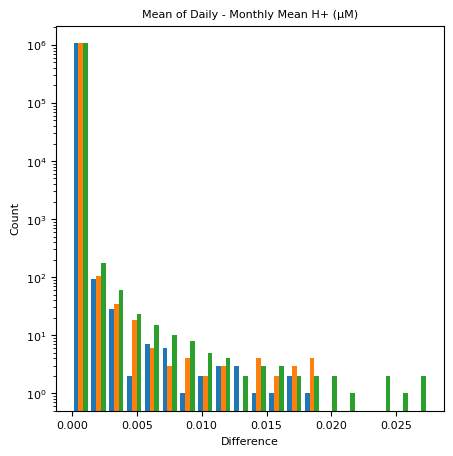

In [7]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.hist(difs.T,20)
ax.set_xlabel('Difference')
ax.set_ylabel('Count')
ax.set_title('Mean of Daily - Monthly Mean H+ (μM)')
ax.set_yscale('log')

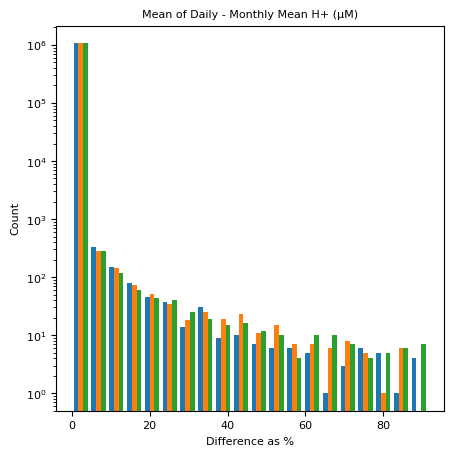

In [8]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.hist(difFrac.T*100,20)
ax.set_xlabel('Difference as %')
ax.set_ylabel('Count')
ax.set_title('Mean of Daily - Monthly Mean H+ (μM)')
ax.set_yscale('log')

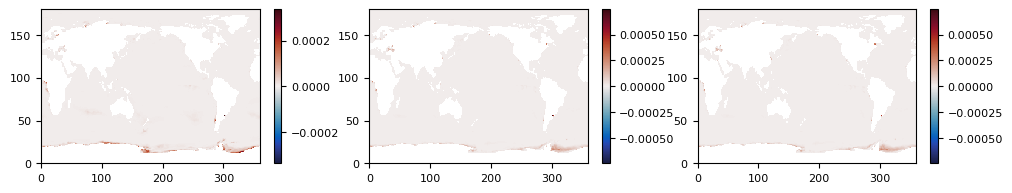

In [10]:
iscen='ESM4_historical_D1'
fig,ax=plt.subplots(1,3,figsize=(12,2))
m=ax[0].pcolormesh(mfd[iscen][-1,:,:]-mm[iscen][-1,:,:],norm=mcols.CenteredNorm(),cmap=cmocean.cm.balance)
fig.colorbar(m,ax=ax[0])
iscen='ESM4_ssp126_D1'
m=ax[1].pcolormesh((mfd[iscen][-1,:,:]-mm[iscen][-1,:,:]),norm=mcols.CenteredNorm(),cmap=cmocean.cm.balance)
fig.colorbar(m,ax=ax[1])
iscen='ESM4_ssp126_D1'
m=ax[2].pcolormesh((mfd[iscen][-1,:,:]-mm[iscen][-1,:,:]),norm=mcols.CenteredNorm(),cmap=cmocean.cm.balance)
fig.colorbar(m,ax=ax[2])

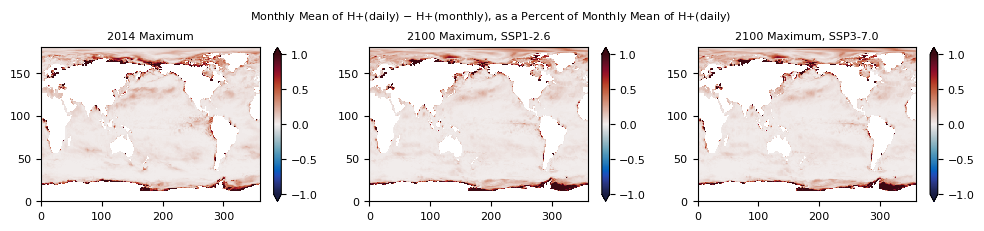

In [35]:
iscen='ESM4_historical_D1'
fig,ax=plt.subplots(1,3,figsize=(12,2))
m=ax[0].pcolormesh(np.max((mfd[iscen][-12:,:,:]-mm[iscen][-12:,:,:])/mfd[iscen][-12:,:,:]*100,axis=0),norm=mcols.CenteredNorm(0,1),cmap=cmocean.cm.balance)
fig.colorbar(m,ax=ax[0],extend='both')
ax[0].set_title('2014 Maximum')
iscen='ESM4_ssp126_D1'
m=ax[1].pcolormesh(np.max((mfd[iscen][-12:,:,:]-mm[iscen][-12:,:,:])/mfd[iscen][-12:,:,:]*100,axis=0),norm=mcols.CenteredNorm(0,1),cmap=cmocean.cm.balance)
fig.colorbar(m,ax=ax[1],extend='both')
ax[1].set_title('2100 Maximum, SSP1-2.6')
iscen='ESM4_ssp126_D1'
m=ax[2].pcolormesh(np.max((mfd[iscen][-12:,:,:]-mm[iscen][-12:,:,:])/mfd[iscen][-12:,:,:]*100,axis=0),norm=mcols.CenteredNorm(0,1),cmap=cmocean.cm.balance)
fig.colorbar(m,ax=ax[2],extend='both')
ax[2].set_title('2100 Maximum, SSP3-7.0')
fig.suptitle('Monthly Mean of H+(daily) $-$ H+(monthly), as a Percent of Monthly Mean of H+(daily)',y=1.07)
fig.savefig('hplus_daily_monthly.png',bbox_inches='tight')

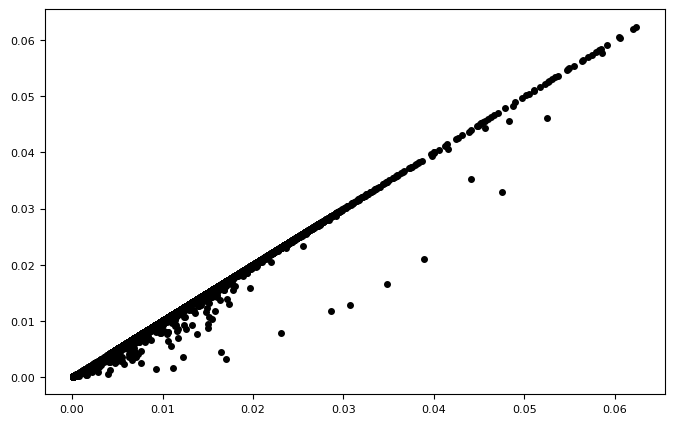

In [28]:
for im in range(-12,0):
    plt.plot(mfd[iscen][im,:,:],mm[iscen][im,:,:],'k.')